In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
match_data=pd.read_csv('matches.csv')
deliveries_data=pd.read_csv('deliveries.csv')

In [3]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Q1.	How many matches we've got in the dataset?

In [5]:

Number_of_matches = len(match_data['id'].value_counts())
Number_of_matches

636

####  Q2.	How many seasons we've got in the dataset?

In [6]:
Number_of_seasons = len(match_data['season'].value_counts())
Number_of_seasons


10

#### Q3.Which Team had won by maximum runs?

43    Mumbai Indians
Name: winner, dtype: object


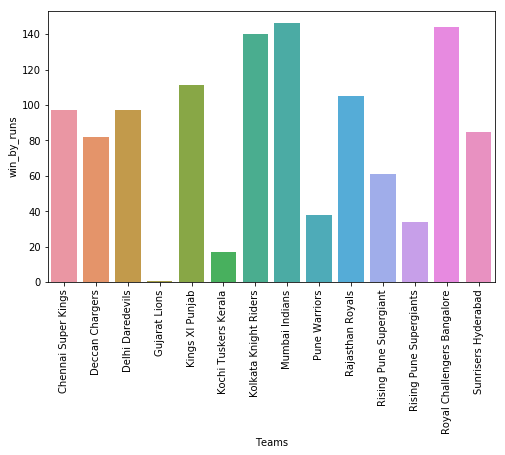

In [5]:
Maximum_runs=match_data['win_by_runs'].max()
print(match_data[(match_data['win_by_runs']==Maximum_runs)]['winner'])
plt.figure(figsize=(8,5));
Team=match_data.groupby(['winner']).agg({'win_by_runs':'max'})
plt.xticks(rotation=90)
sns.barplot(x=Team.index,y='win_by_runs',data=Team)
plt.xlabel('Teams')
plt.show()

#### Q4.Which Team had won by maximum wickets?

Kolkata Knight Riders


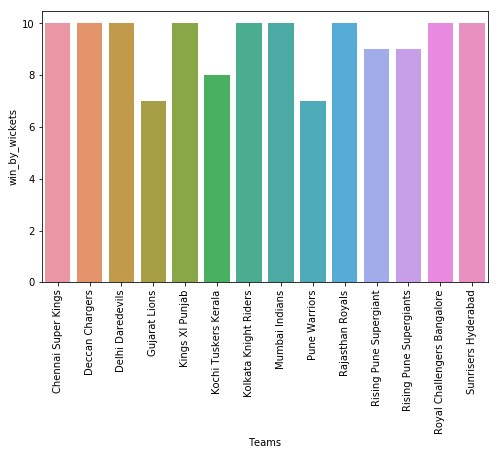

In [7]:
wickets=match_data['win_by_wickets'].max()
print(match_data[(match_data['win_by_wickets']==wickets)]['winner'].iloc[0])
plt.figure(figsize=(8,5))
Team=match_data.groupby(['winner']).agg({'win_by_wickets':'max'})
sns.barplot(x=Team.index,y='win_by_wickets',data=Team)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.show()

#### Q5. Which Team had won by closest Margin (minimum runs)?

Rising Pune Supergiant


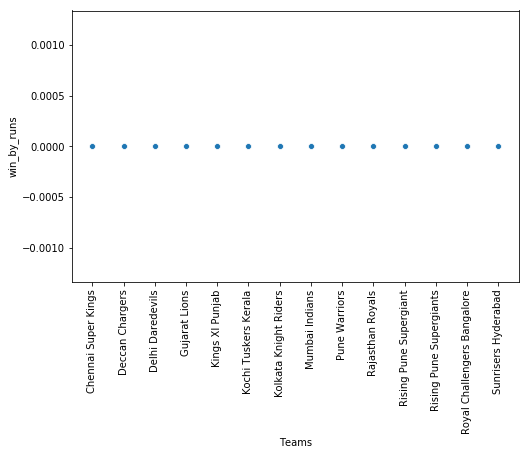

In [9]:
closest=match_data['win_by_runs'].min()
print(match_data[(match_data['win_by_runs']==closest)]['winner'].iloc[0])
plt.figure(figsize=(8,5))
Team=match_data.groupby(['winner']).agg({'win_by_runs':'min'})
sns.scatterplot(x=Team.index,y='win_by_runs',data=Team)
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.show()

#### Q6.Which Team had won by minimum wicket?

In [10]:
max_wicket=match_data['win_by_wickets'].max()
print(match_data[(match_data['win_by_wickets']==max_wicket)]['winner'].iloc[0])


Kolkata Knight Riders


#### Q7. Which Season had most number of matches?

In [39]:
seasonGrp=match_data.groupby(['season']).agg({'id':'count'})
maxCount=match_data[match_data['id']==match_data['id'].max()]
print(maxCount.index[0])
plt.figure(figsize=(19,5))
sns.barplot(x=seasonGrp.index,y='id',data=match_data)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

635


ValueError: Grouper and axis must be same length

<Figure size 1368x360 with 0 Axes>

In [12]:
seasonGrp=match_data.groupby(['season']).agg({'id':'count'})
seasonGrp

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


In [13]:
maxCount=match_data[match_data['id']==match_data['id'].max()]
maxCount

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


#### Q8.Which IPL Team is more successful?

Mumbai Indians


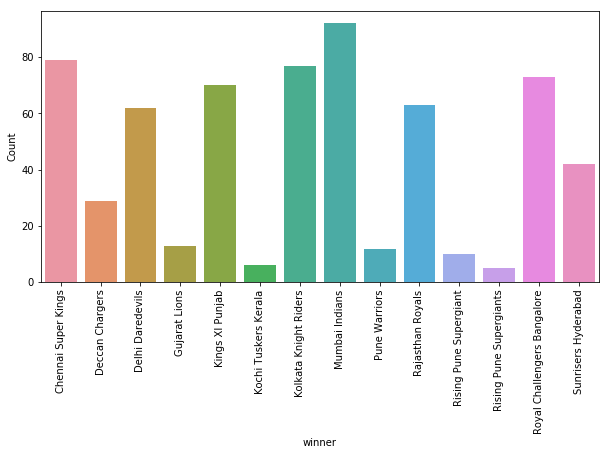

In [40]:
iplTeam=match_data.groupby('winner').agg({'id':'count'})b
winTeam=iplTeam[iplTeam['id']==iplTeam['id'].max()].index[0]
print(winTeam)
plt.figure(figsize=(10,5))
sns.barplot(x=iplTeam.index,y='id',data=iplTeam)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
iplTeam=match_data.groupby('winner').agg({'id':'count'})
iplTeam

,id
winner,
Chennai Super Kings,79
Deccan Chargers,29
Delhi Daredevils,62
Gujarat Lions,13
Kings XI Punjab,70
Kochi Tuskers Kerala,6
Kolkata Knight Riders,77
Mumbai Indians,92
Pune Warriors,12


In [15]:
winTeam=iplTeam[iplTeam['id']==iplTeam['id'].max()].index[0]
winTeam

'Mumbai Indians'

#### Q9. Has Toss-winning helped in winning matches?

YES


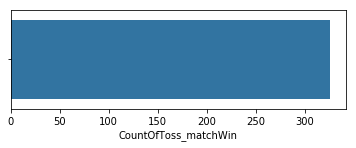

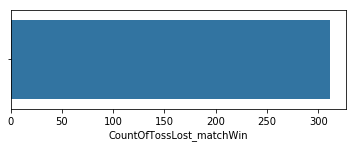

In [20]:
tossWin=match_data[match_data['winner']==match_data['toss_winner']].shape[0]
tossWin
tossLose=match_data[match_data['winner']!=match_data['toss_winner']].shape[0]
if tossWin>tossLose:
    print('YES')
else:
    print('NO')

plt.figure(1)
plt.subplot(211)
plt.xlabel('CountOfToss_matchWin')

sns.barplot(x=tossWin,data=match_data)
plt.figure(2)
plt.subplot(211)
plt.xlabel('CountOfTossLost_matchWin')
sns.barplot(x=tossLose,data=match_data)

plt.show()

In [ ]:
#above plot shows the number of team and count of matches that have won and toss helped them in winning the game